In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
import os
path = os.getcwd() + '\data\ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1

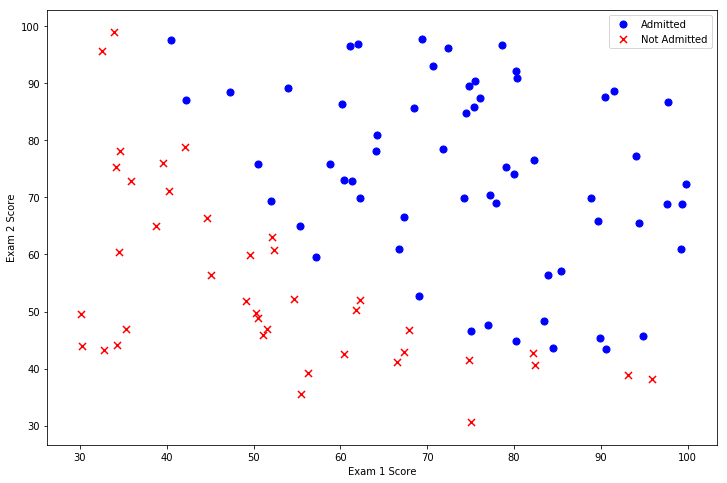

In [79]:
positive=data[data['Admitted'].isin([1])]
negative=data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')

ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [80]:
def sigmoid(z):
    sigmoid = 1/(1+np.exp(-z))
    return sigmoid

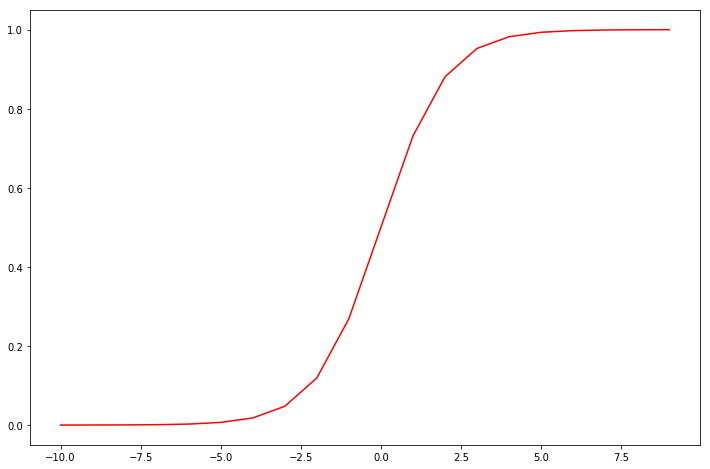

In [15]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

In [168]:
def computeCost(theta,X,y):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    first=np.multiply(-y,np.log(sigmoid((X*theta.T))))
    second=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/(len(y))

In [133]:
data.insert(0, 'Ones', 1)

cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

ValueError: cannot insert Ones, already exists

In [134]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [167]:
computeCost(X,y,theta)
theta2 = np.matrix(theta)
parameters=int(theta2.ravel().shape[1])
grad=np.zeros(parameters)
grad.shape
error = sigmoid(X * theta.T) - y
error.T.shape, X.shape
((np.matmul(error.T,X))/len(X))[0].shape

(3,)

In [165]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)
    
    error=sigmoid(X*theta.T)-y
    
    return ((np.matmul(error.T,X))/len(X)).T

In [166]:
gradient(theta, X, y).shape
theta.shape, X.shape, y.shape, gradient(theta, X, y).shape

((3,), (100, 3), (100, 1), (3, 1))

In [170]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131846,   0.20623159,   0.20147148]), 36, 0)

In [174]:
computeCost(result[0], X, y)

0.20349770158947525

In [176]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [187]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


In [321]:
path = os.getcwd() + '\data\ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

Test 1   Test 2  Accepted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1

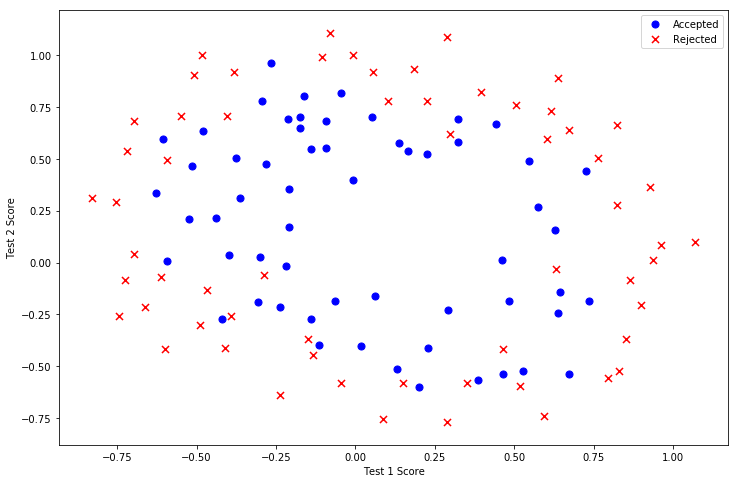

In [322]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [323]:
def computeCostReg(theta,X,y,learningRate):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    lamb=learningRate
    first=np.multiply(-y,np.log(sigmoid((X*theta.T))))
    second=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    reg=(lamb/(2*len(X)))*np.sum(np.power(theta,2))
    return np.sum(first-second)/(len(y))

In [394]:
def gradientReg(theta,X,y,learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    lamb=learningRate
    
    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)
    
    error=sigmoid(X * theta.T)-y
    
    gradNR=((np.matmul(error.T,X))/len(X))
    gradR=gradNR+((lamb/len(X))*theta)
    gradRF=gradR
    gradRF[0]=gradNR[0]
    A = np.squeeze(np.asarray(gradRF))
    return A

In [387]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

learningRate=1

cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)
theta2.shape, X2.shape,y2.shape

KeyError: 'Test 1'

In [391]:
computeCostReg(theta,X,y,learningRate)

0.69314718055994529

In [390]:
gradientReg(theta2,X2,y2,learningRate)

array([ 0.00847458,  0.01878809,  0.05034464,  0.01150133,  0.01835599,
        0.00732393,  0.00819244,  0.03934862,  0.00223924,  0.01286005,
        0.00309594])

In [392]:
result2 = opt.fmin_tnc(func=computeCostReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

(array([ 0.53070799,  0.2915905 , -1.61043236, -0.58237427,  0.01615713,
        -0.21260336, -0.40181811, -1.36892034,  0.02274353, -0.94999678,
         0.03389813]), 49, 4)

In [393]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 78%


In [370]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, y2.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [371]:
model.score(X2, y2)

0.66101694915254239